In [1]:
#import libraries
import os 
import missingno as msno
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
from time import sleep
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException, ElementClickInterceptedException, TimeoutException
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.by import By 
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

C:\Users\ADMIN\anaconda3\envs\dataanalitics\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ADMIN\anaconda3\envs\dataanalitics\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ADMIN\anaconda3\envs\dataanalitics\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
df_schools = pd.read_csv('test_schools_df.csv')

In [4]:
df_schools.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,DataYear,EMIS,province,name,STATUS,Sector,Phase_PED,Specialisation,Town_City,StreetAddress,PostalAddress,new_lat,new_long,new_lat GoogleV3,new_long GoogleV3
0,0,0,0,2021,200200592,EC,ST JUDES LEARNING CENTRE,PENDING CLOSED,Independent/Private,PS,PRIMARY SUBJECTS,NaN,000,NaN,NaN,NaN,NaN,NaN
1,1,1,2,2021,200201066,EC,ST JUDES LEARNING CENTRE,PENDING CLOSED,Independent/Private,PS,PRIMARY SUBJECTS,NaN,000,NaN,NaN,NaN,NaN,NaN
2,2,2,3,2021,200601161,EC,OLIVETI PRIVATE SCHOOL,PENDING CLOSED,Independent/Private,PS,PRIMARY SUBJECTS,NaN,000,NaN,NaN,NaN,NaN,NaN
3,3,3,12,2021,440101143,FS,AMETIS PF/S,OPEN,PUBLIC,PS,ORDINARY,BETHLEHEM,AMETIS FARM BETHLEHEM 9700,"PO BOX 1901, BETHLEHEM, 9700",NaN,NaN,NaN,NaN
4,4,4,23,2021,440101131,FS,PIETERSHOF PF/S,OPEN,PUBLIC,PS,ORDINARY,BETHLEHEM,HIGHLANDS FARM BETHLEHEM 9700,"PO BOX 309, BETHLEHEM, 9700",NaN,NaN,40.6259316,-75.37045789999999


In [5]:
df_schools.tail(5)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,DataYear,EMIS,province,name,STATUS,Sector,Phase_PED,Specialisation,Town_City,StreetAddress,PostalAddress,new_lat,new_long,new_lat GoogleV3,new_long GoogleV3
25307,25307,25307,25273,2022,200601200,EC,ROHOBOTH PRIMARY SCHOOL,OPEN,Independent/Private,PS,ORDINARY SCHOOL,NaN,"7 CALDERWOOD STREET, WHITTELSEA,5360",NaN,26.822686,-32.177022,26.822686,-32.177022
25308,25308,25308,25274,2022,200201097,EC,AMITEK BUSINESS HIGH SCHOOL,OPEN,Independent/Private,SS,ORDINARY SCHOOL,NaN,"1 SYRINGA ROAD, FORT HILL, KING WILLIAMS TOWN,...",NaN,27.402986,-32.883768,27.402986,-32.883768
25309,25309,25309,25275,2022,200201087,EC,Dreamland Primary,OPEN,Independent/Private,PS,ORDINARY SCHOOL,NaN,"81 Green Point, Road Buffalo Flats , East London",TBU,27.87180423,-33.02202086,27.87180423,-33.02202086
25310,25310,25310,25276,2022,200101047,EC,KLOOF COTTAGE PRIMARY SCHOOL,OPEN,Independent/Private,PS,ORDINARY SCHOOL,NaN,"10 RIVER ROAD, WALMER, PORT ELIZABETH,6000",NaN,25.59268,-33.969948,25.59268,-33.969948
25311,25311,25311,25277,2022,200101048,EC,THE GEM PROJECT YOUTH ACADEMY,OPEN,Independent/Private,SS,ORDINARY SCHOOL,NaN,"238 CORNER OF LAKESIDE AND KRAGGA KAMMA ROADS,...",NaN,25.41777,-33.97909,25.41777,-33.97909


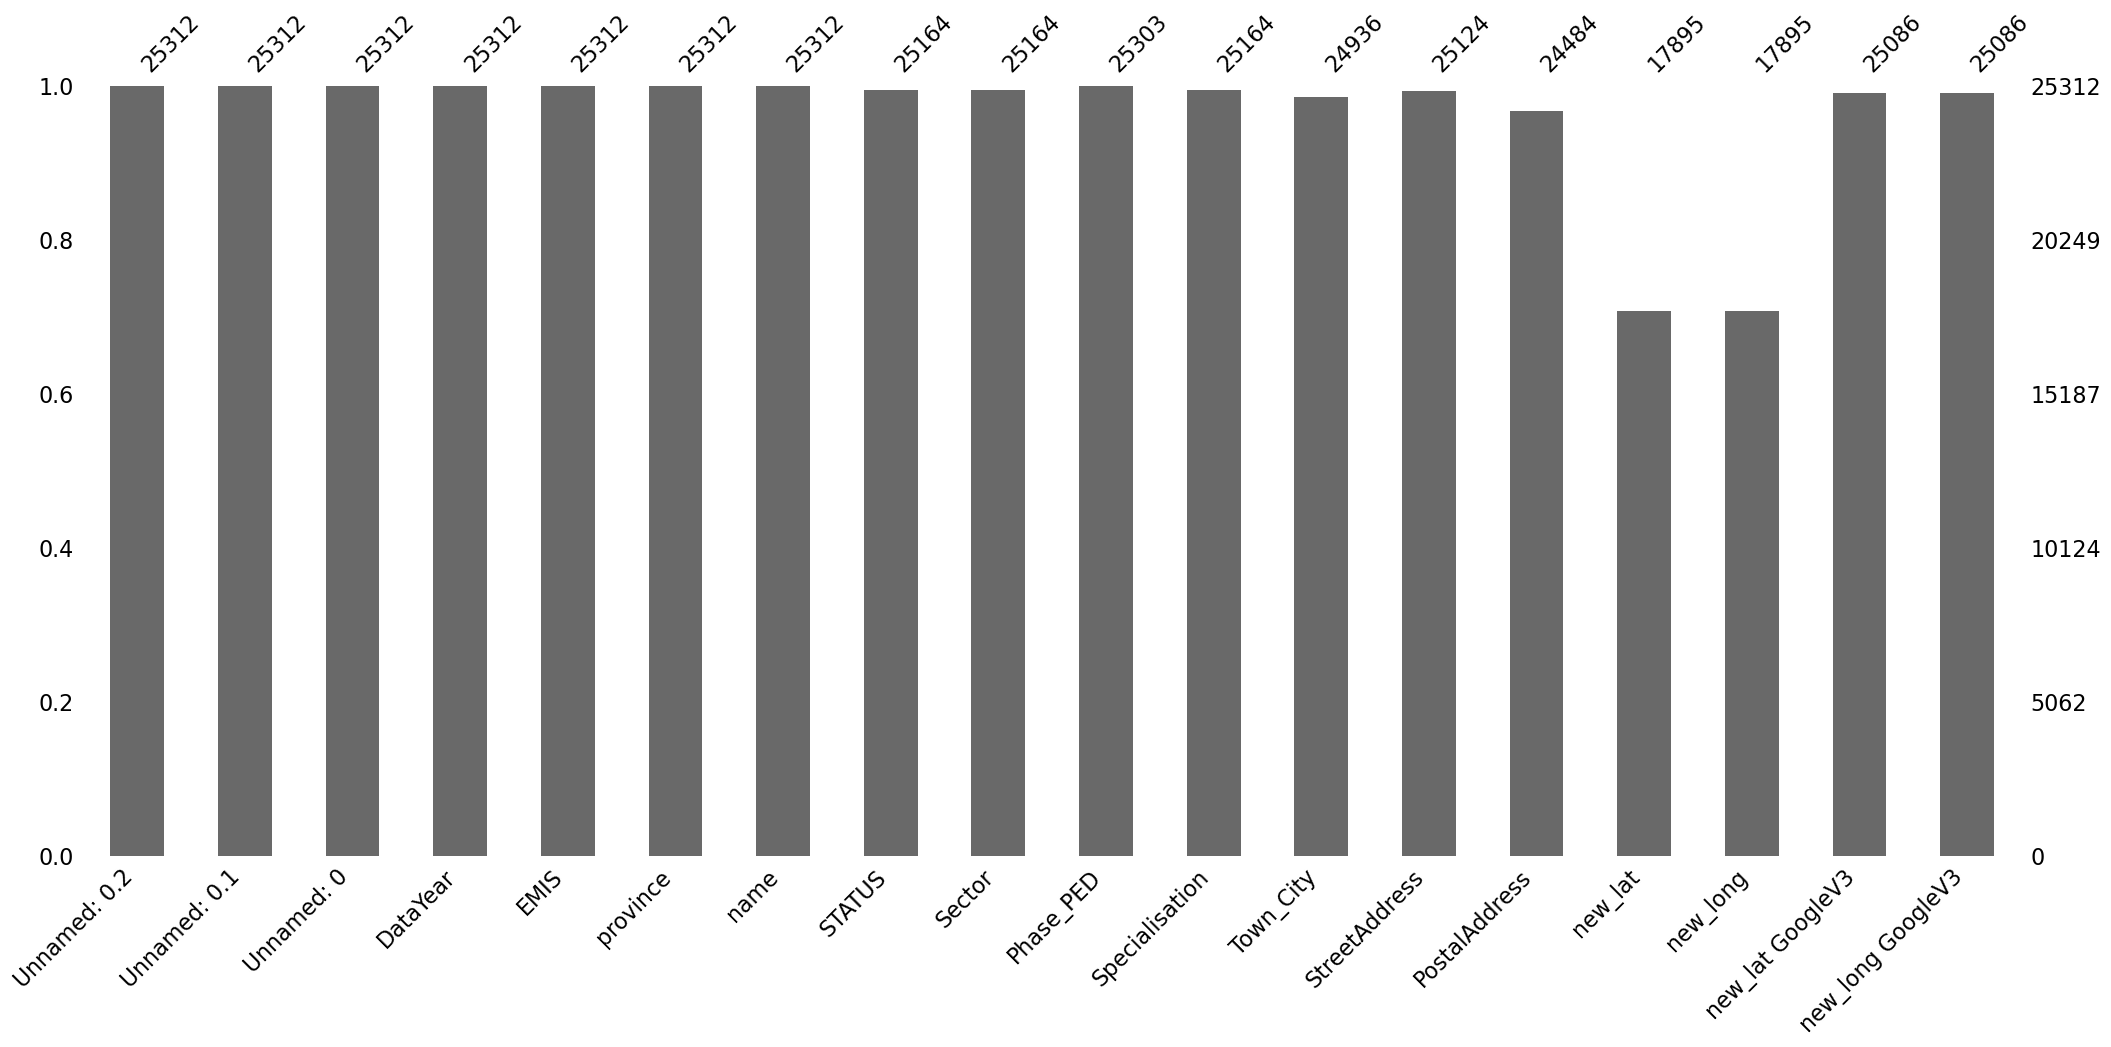

In [6]:
msno.bar(df_schools)
plt.show()

In [7]:
mask = (df_schools['new_lat GoogleV3'].isna() & df_schools['new_long GoogleV3'].isna())

df_missing = df_schools[mask]

In [8]:
df_missing

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,DataYear,EMIS,province,name,STATUS,Sector,Phase_PED,Specialisation,Town_City,StreetAddress,PostalAddress,new_lat,new_long,new_lat GoogleV3,new_long GoogleV3
0,0,0,0,2021,200200592,EC,ST JUDES LEARNING CENTRE,PENDING CLOSED,Independent/Private,PS,PRIMARY SUBJECTS,NaN,000,NaN,NaN,NaN,NaN,NaN
1,1,1,2,2021,200201066,EC,ST JUDES LEARNING CENTRE,PENDING CLOSED,Independent/Private,PS,PRIMARY SUBJECTS,NaN,000,NaN,NaN,NaN,NaN,NaN
2,2,2,3,2021,200601161,EC,OLIVETI PRIVATE SCHOOL,PENDING CLOSED,Independent/Private,PS,PRIMARY SUBJECTS,NaN,000,NaN,NaN,NaN,NaN,NaN
3,3,3,12,2021,440101143,FS,AMETIS PF/S,OPEN,PUBLIC,PS,ORDINARY,BETHLEHEM,AMETIS FARM BETHLEHEM 9700,"PO BOX 1901, BETHLEHEM, 9700",NaN,NaN,NaN,NaN
5,5,6,30,2021,440704011,FS,SACSONIA PF/S,OPEN,PUBLIC,PS,ORDINARY,BRANDFORT,SACSONIA BRANDFORT 9400,"PO BOX 362, BRANDFORT, 9400",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,257,267,7397,2022,800035707,MP,BEACON COLLEGE NKOMAZI,OPEN,Independent,NaN,NOT APPLICABLE,NKOMAZI,STAND 11 CNR MATHEWS & ALFRED HUTCHINSON STREETS,"PO BOX 830, Malelane 1320",NaN,NaN,NaN,NaN
258,258,268,7398,2022,800035714,MP,KLEINWATER COLLEGE,OPEN,Independent,NaN,NOT APPLICABLE,EMALAHLENI,DIVISION JS PORTION 301/17,"PO BOX 215, Nelspruit 1200",NaN,NaN,NaN,NaN
259,259,269,7400,2022,800035718,MP,ABC PRESTIGE SCHOOL,OPEN,Independent,NaN,NOT APPLICABLE,NELSPRUIT,NEETHLING STREET NO. 8,"BOX 26294, Steiltes 1213",NaN,NaN,NaN,NaN
260,260,276,25284,2022,200800872,EC,ROSARAY PRE-PRIMARY SCHOOL,OPEN,Public,ECD,Ordinary School,NaN,21 MAIN RD MICHAUSDAL 5880,"P O BOX 2014, MICHAUSDAL, 5880",2563681,-3217421,NaN,NaN


In [9]:
#extract school names
school_names = df_missing['name'].to_list() #247 schools

In [10]:
school_names[:6]

['ST JUDES LEARNING CENTRE',
 'ST JUDES LEARNING CENTRE',
 'OLIVETI PRIVATE SCHOOL',
 'AMETIS PF/S',
 'SACSONIA PF/S',
 'KINGDOM KIDS']

In [11]:
abbreviations = {' PF/S': ' Primary',  'LEARNING CENTRE': ' Primary', 'IF/S': ' Intermediate', ' PI/S': ' Primary', ' CI/S': ' Combined', ' S/S': ' Secondary', ' J/S': ' Junior'}

In [12]:
new_list = []

for school_name in school_names:
    for key, value in abbreviations.items():
        if key in school_name:
            school_name = school_name.replace(key, value)
    new_list.append(school_name.lower())

print(new_list)

['st judes  primary', 'st judes  primary', 'oliveti private school', 'ametis primary', 'sacsonia primary', 'kingdom kids', 'tokoloho primary', 'yeddo primary', 'rooikop  intermediate', 'ed-u-college qq primary', 'taaibos p/s', 'new horizon college combined', 'popano secondary', 'lukhasini primary school', 'masakhane junior primary school', 'ginyiqhinga senior secondary school', 'deepdale junior secondary school', 'eastlands junior primary school', 'imfume senior primary school', 'ecekeza secondary school', 'mbambuya primary school', 'jamengweni primary school', 'siyephu primary school', 'harding  primary  school', 'marshmount primary school', 'mbangweni primary school', 'mbonwa secondary school', 'mdlangathi secondary school', 'mahelane secondary school', 'zimema primary school', 'emaweleni combined school', 'dunywa primary school', 'ntintisa primary school', "st. joseph's secondary school", 'kameel hoek farm school', 'new hanover primary farm school', 'matatane secondary school', 'dal

In [13]:
#select range (test)
n_range = 6

In [14]:
data = pd.DataFrame()
data['SCHOOL_NAME'] = new_list[:n_range]

In [15]:
# Initialising the WebDriver
options = Options()
options.headless = True
driver = webdriver.Chrome(options=options)
driver.get("https://schoolsdigest.co.za")

results = []

for i in new_list[:n_range]:

    print(f"Processing School: {i}")
    
    try:
        # Navigate to the search box and enter the EMIS number
        search_box = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.NAME, "query")))
        search_box.send_keys(i)

        # Wait for the submission button to be clickable, and then click it
        submit_query = WebDriverWait(driver, 5).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="content"]/div/section[1]/div[2]/div/div/section/div/div/div/div/div/div/div/button')))
        submit_query.click()

        # Try to find the school image, click on it, and extract data
        try:
            # Wait for the school image to appear and then click it
            image_element = WebDriverWait(driver, 5).until(EC.element_to_be_clickable((By.CLASS_NAME,"jet-listing-dynamic-field__content")))

            image_xpath = '//*[@id="content"]/div/section[2]/div/div/div/div/div/div/div[1]/div/div/div/div/div[2]/div/div/div/div'
            
            # Try to click on the element up to three times (can be affected by overallaping element/internet speed)
            for attempt in range(4):
                try:
                    image_element = WebDriverWait(driver, 6).until(EC.element_to_be_clickable((By.XPATH, image_xpath)))
                    image_element.click()
                    break
                except ElementClickInterceptedException:
                    print(f"ElementClickInterceptedException on attempt {attempt + 1}. Waiting and trying again.")
                    sleep(2)
                except StaleElementReferenceException:
                    print(f"StaleElementReferenceException on attempt {attempt + 1}. Relocating the element and trying again.")
            
            # Wait for the map iframe to load, scroll to it and then switch to it
            iframe_element = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CSS_SELECTOR, ".elementor-widget-google_maps iframe")))
            ActionChains(driver).move_to_element(iframe_element).perform()
            driver.switch_to.frame(iframe_element)

            # Extract coordinates from the map
            map_frame = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CSS_SELECTOR, '.place-name')))
            coordinates = map_frame.text.split(" ")

            # Convert coordinates from DMS to Decimal format
            latitude = round(int(coordinates[0][:2]) + int(coordinates[0][3:5])/60.0 + float(coordinates[0][6:10])/3600.0, 4)
            longitude = round(int(coordinates[1][:2]) + int(coordinates[1][3:5])/60.0 + float(coordinates[1][6:10])/3600.0, 4)

            # Append the results to the results list
            results.append((latitude, longitude))

        except (NoSuchElementException, TimeoutException):
            print(f"School {i} not found or did not load in time.")
            results.append((np.nan, np.nan))
        finally:
            # Navigate back to the landing page and refresh
            driver.get("https://schoolsdigest.co.za")
            driver.refresh()

    except Exception as e:
        print(f"An error occurred: {str(e)}")

driver.quit()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9208\932056865.py:3: DeprecationWarning: headless property is deprecated, instead use add_argument('--headless') or add_argument('--headless=new')
  options.headless = True


Processing School: st judes  primary
ElementClickInterceptedException on attempt 1. Waiting and trying again.
ElementClickInterceptedException on attempt 2. Waiting and trying again.
Processing School: st judes  primary
ElementClickInterceptedException on attempt 1. Waiting and trying again.
Processing School: oliveti private school
ElementClickInterceptedException on attempt 1. Waiting and trying again.
School oliveti private school not found or did not load in time.
Processing School: ametis primary
ElementClickInterceptedException on attempt 1. Waiting and trying again.
StaleElementReferenceException on attempt 2. Relocating the element and trying again.
Processing School: sacsonia primary
ElementClickInterceptedException on attempt 1. Waiting and trying again.
StaleElementReferenceException on attempt 2. Relocating the element and trying again.
Processing School: kingdom kids
ElementClickInterceptedException on attempt 1. Waiting and trying again.


In [16]:
#display sample results (coordinates)
results[:5]

[(31.5854, 28.7965),
 (31.5854, 28.7965),
 (nan, nan),
 (25.7961, 29.4634),
 (28.6519, 26.7419)]

In [17]:
#append results to dataframe
data[['Latitude', 'Longitude']] = results

In [18]:
data.head()

,SCHOOL_NAME,Latitude,Longitude
0,st judes primary,31.5854,28.7965
1,st judes primary,31.5854,28.7965
2,oliveti private school,NaN,NaN
3,ametis primary,25.7961,29.4634
4,sacsonia primary,28.6519,26.7419
